In [2]:
from codes.python import metric
import numpy as np
from scipy import signal
import scipy
from numpy import array
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats
import warnings
import termcolor as colored
from math import*
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from mpl_toolkits.mplot3d import axes3d, Axes3D
from codes.python import post_process_features_ex as post_features
import pymrmr as mrmr


ModuleNotFoundError: No module named 'pymrmr'

In [7]:
#ls = [0]
patient_l_1 = [101]
patient_l_2 = [100]
#patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
#patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]

In [8]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)   

In [9]:
DB1_patients = pd.read_csv("DB1_patient_list.csv")
DB1_patients = DB1_patients.drop([1872])
#DB1_patients = DB1_patients[DB1_patients['class_ID'].isin(ls)]
#DB1_patients = DB1_patients[DB1_patients['0'].isin(patient_l_1)]


DB2_patients = pd.read_csv("DB2_patient_list.csv")
DB2_patients= DB2_patients.drop([18692, 31865])
#DB2_patients = DB2_patients[DB2_patients['class_ID'].isin(ls)]
#DB2_patients = DB2_patients[DB2_patients['0'].isin(patient_l_2)]


DB1 = pd.read_csv("DB1.csv")
DB1 = DB1.drop([1872])
#DB1 = DB1[DB1['class_ID'].isin(ls)]
#DB1 = DB1[DB1['patient'].isin(patient_l_1)]


DB2 = pd.read_csv("DB2.csv")
DB2 = DB2.drop([18692, 31865])
#DB2 = DB2[DB2['class_ID'].isin(ls)]
#DB2 = DB2[DB2['patient'].isin(patient_l_2)]


In [59]:
type(DB2)

pandas.core.frame.DataFrame

In [10]:
patients_ls_1 = DB1_patients.iloc[:,0]
patients_ls_2 = DB2_patients.iloc[:,0]

#patients_ls_1 = np.asarray(DB1_patients, dtype=int)
patients_ls_1 = [int(i) for i in patients_ls_1]
patients_ls_1 = np.asarray(patients_ls_1, dtype=int)
patients_ls_1 = patients_ls_1.reshape(patients_ls_1.shape[0],1)
#patients_ls_2 = np.asarray(DB2_patients, dtype=int)
patients_ls_2 = [int(i) for i in patients_ls_2]
patients_ls_2 = np.asarray(patients_ls_2, dtype=int)
patients_ls_2 = patients_ls_2.reshape(patients_ls_2.shape[0],1)

patients_ls_all = np.vstack((patients_ls_1,patients_ls_2))

#patients_ls_all = patients_ls_all.reshape(7980,1)

patients_ls_all = [int(i) for i in patients_ls_all]

patients_ls_2 = [int(i) for i in patients_ls_2]
patients_ls_1 = [int(i) for i in patients_ls_1]



In [11]:
DB1_amp = pd.read_csv("DB1_amp_time.csv")
DB1_amp = DB1_amp.drop([1872])
#DB1_amp = DB1_amp[DB1_amp['patient'].isin(patient_l_1)]
#DB1_amp = DB1_amp[DB1_amp['col1081'].isin(ls)]



DB2_amp = pd.read_csv("DB2_amp_time.csv")
DB2_amp = DB2_amp.drop([18692, 31865])
#DB2_amp = DB2_amp[DB2_amp['patient'].isin(patient_l_2)]
#DB2_amp = DB2_amp[DB2_amp['col1081'].isin(ls)]





In [12]:
DB1_non_cli = pd.read_csv("DB1_non_clinic.csv")
DB1_non_cli = DB1_non_cli.drop([1872])
#DB1_non_cli = DB1_non_cli[DB1_non_cli['patient'].isin(patient_l_1)]


#DB1_non_cli = DB1_non_cli[DB1_non_cli['y1'].isin(ls)]


DB2_non_cli = pd.read_csv("DB2_non_clinic.csv")
DB2_non_cli= DB2_non_cli.drop([18692, 31865])
#DB2_non_cli = DB2_non_cli[DB2_non_cli['y1'].isin(ls)]
#DB2_non_cli = DB2_non_cli[DB2_non_cli['patient'].isin(patient_l_2)]



In [13]:

DB1_V1 = pd.read_csv("DB1_V1.csv")
DB1_V1 = DB1_V1.drop([1872])
#DB1_V1 = DB1_V1[DB1_V1['class_ID'].isin(ls)]
#DB1_V1 = DB1_V1[DB1_V1['patient'].isin(patient_l_1)]



DB2_V1 = pd.read_csv("DB2_V1.csv")
DB2_V1 = DB2_V1.drop([18692, 31865])
#DB2_V1 = DB2_V1[DB2_V1['class_ID'].isin(ls)]
#DB2_V1 = DB2_V1[DB2_V1['patient'].isin(patient_l_2)]

In [14]:
DB1_dwt = pd.read_csv("DB1_DTW_MLII.csv")
DB1_dwt = DB1_dwt.drop([1872])
#DB1_dwt = DB1_dwt[DB1_dwt['class_ID'].isin(ls)]
#DB1_dwt = DB1_dwt[DB1_dwt['patient'].isin(patient_l_1)]


DB2_dwt = pd.read_csv("DB2_DTW_MLII.csv")
DB2_dwt = DB2_dwt.drop([18692, 31865])
#DB2_dwt = DB2_dwt[DB2_dwt['class_ID'].isin(ls)]
#DB2_dwt = DB2_dwt[DB2_dwt['patient'].isin(patient_l_2)]


DB1_dwt_V1 = pd.read_csv("DB1_DTW_V1.csv")
DB1_dwt_V1 = DB1_dwt_V1.drop([1872])
#DB1_dwt_V1 = DB1_dwt_V1[DB1_dwt_V1['class_ID'].isin(ls)]
#DB1_dwt_V1 = DB1_dwt_V1[DB1_dwt_V1['patient'].isin(patient_l_1)]



DB2_dwt_V1 = pd.read_csv("DB2_DTW_V1.csv")
DB2_dwt_V1 = DB2_dwt_V1.drop([18692, 31865])
#DB2_dwt_V1 = DB2_dwt_V1[DB2_dwt_V1['class_ID'].isin(ls)]
#DB2_dwt_V1 = DB2_dwt_V1[DB2_dwt_V1['patient'].isin(patient_l_2)]

In [1]:
 #list(DB1.columns.values)
variables_1 = DB1.iloc[:,0:130]
class_beat_1 = DB1_patients.iloc[:,2]
class_ID_1 = DB1_patients.iloc[:,1]

np_variables_1 = np.asarray(variables_1)
np_class_beat_1 = np.asarray(class_beat_1)
np_class_ID_1 = np.asarray(class_ID_1)

np_class_beat_1 = np_class_beat_1.reshape(np_class_beat_1.shape[0],1)
np_class_ID_1 = np_class_ID_1.reshape(np_class_ID_1.shape[0],1)

variables_2 = DB2.iloc[:,0:130]
class_beat_2 = DB2_patients.iloc[:,2]
class_ID_2 = DB2_patients.iloc[:,1]

np_variables_2 = np.asarray(variables_2)
np_class_beat_2 = np.asarray(class_beat_2)
np_class_ID_2 = np.asarray(class_ID_2)

np_class_beat_2 = np_class_beat_2.reshape(np_class_beat_2.shape[0],1)
np_class_ID_2 = np_class_ID_2.reshape(np_class_ID_2.shape[0],1)

DB_var_all = np.vstack((np_variables_1,np_variables_2))
DB_class_all = np.vstack((np_class_ID_1,np_class_ID_2))
DB_type_all = np.vstack((np_class_beat_1,np_class_beat_2))

np_class_beat_1 = [str(i) for i in np_class_beat_1]
np_class_ID_1 = [int(i) for i in np_class_ID_1]

np_class_beat_1 = np.asarray(np_class_beat_1)
np_class_ID_1 = np.asarray(np_class_ID_1)


np_class_beat_2 = [str(i) for i in np_class_beat_2]
np_class_ID_2 = [int(i) for i in np_class_ID_2]

np_class_beat_2 = np.asarray(np_class_beat_2)
np_class_ID_2 = np.asarray(np_class_ID_2)

DB_type_all = [str(i) for i in DB_type_all]
DB_class_all = [int(i) for i in DB_class_all]

DB_type_all = np.asarray(DB_type_all)
DB_class_all = np.asarray(DB_class_all)

NameError: name 'DB1' is not defined

In [16]:
#DB1_patients.to_csv("DB1_DWT.csv", index=False)
#DB2_patients.to_csv("DB2_DWT.csv", index=False)

#DB1_dwt_V1.to_csv("DB1_DTW_V1.csv", index=False)
#DB2_dwt_V1.to_csv("DB1_DTW_V1.csv", index=False)

In [17]:
np_non_1 = np.asarray(DB1_non_cli)
np_non_2 = np.asarray(DB2_non_cli)

np_non_var_1 = np.asarray(DB1_non_cli.iloc[:,0:140])



np_non_var_2 = np.asarray(DB2_non_cli.iloc[:,0:140])

DB_var_non_all = np.vstack((np_non_var_1,np_non_var_2))


In [18]:
dis_1 = DB1_dwt.iloc[:,0]


dis_2 = DB2_dwt.iloc[:,0]

dis_1_V1 = DB1_dwt_V1.iloc[:,0]


dis_2_V1 = DB2_dwt_V1.iloc[:,0]

dtw_1 = np.asarray(dis_1)
dtw_1 = dtw_1.reshape(dtw_1.shape[0],1)

dtw_2 = np.asarray(dis_2)
dtw_2 = dtw_2.reshape(dtw_2.shape[0],1)

dtw_1_V1 = np.asarray(dis_1_V1)
dtw_1_V1 = dtw_1_V1.reshape(dtw_1_V1.shape[0],1)


dtw_2_V1 = np.asarray(dis_2_V1)
dtw_2_V1 = dtw_2_V1.reshape(dtw_2_V1.shape[0],1)

In [19]:
ampt_time_1 = DB1_amp.iloc[:,0:1082-2]


ampt_time_2 = DB2_amp.iloc[:,0:1082-2]

np_amp_1 = np.asarray(ampt_time_1)
np_amp_2 = np.asarray(ampt_time_2)

In [20]:
v1_1 = DB1_V1.iloc[:,0:130]

np_V1_1 = np.asarray(v1_1)


v1_2 = DB2_V1.iloc[:,0:130]

np_V1_2 = np.asarray(v1_2)

DB_v_var_all = np.vstack((np_V1_1,np_V1_2))


In [21]:
norm_var_1_MLII = post_features.normalised_values_multiples(np_variables_1)
norm_var_2_MLII = post_features.normalised_values_multiples(np_variables_2)

norm_var_1_V1 = post_features.normalised_values_multiples(np_V1_1)
norm_var_2_V2 = post_features.normalised_values_multiples(np_V1_2)


done norm
row 0 done
done norm
row 1 done
done norm
row 2 done
done norm
row 3 done
done norm
row 4 done
done norm
row 5 done
done norm
row 6 done
done norm
row 7 done
done norm
row 8 done
done norm
row 9 done
done norm
row 10 done
done norm
row 11 done
done norm
row 12 done
done norm
row 13 done
done norm
row 14 done
done norm
row 15 done
done norm
row 16 done
done norm
row 17 done
done norm
row 18 done
done norm
row 19 done
done norm
row 20 done
done norm
row 21 done
done norm
row 22 done
done norm
row 23 done
done norm
row 24 done
done norm
row 25 done
done norm
row 26 done
done norm
row 27 done
done norm
row 28 done
done norm
row 29 done
done norm
row 30 done
done norm
row 31 done
done norm
row 32 done
done norm
row 33 done
done norm
row 34 done
done norm
row 35 done
done norm
row 36 done
done norm
row 37 done
done norm
row 38 done
done norm
row 39 done
done norm
row 40 done
done norm
row 41 done
done norm
row 42 done
done norm
row 43 done
done norm
row 44 done
done norm
row 45 don

done norm
row 113 done
done norm
row 114 done
done norm
row 115 done
done norm
row 116 done
done norm
row 117 done
done norm
row 118 done
done norm
row 119 done
done norm
row 120 done
done norm
row 121 done
done norm
row 122 done
done norm
row 123 done
done norm
row 124 done
done norm
row 125 done
done norm
row 126 done
done norm
row 127 done
done norm
row 128 done
done norm
row 129 done
done norm
row 0 done
done norm
row 1 done
done norm
row 2 done
done norm
row 3 done
done norm
row 4 done
done norm
row 5 done
done norm
row 6 done
done norm
row 7 done
done norm
row 8 done
done norm
row 9 done
done norm
row 10 done
done norm
row 11 done
done norm
row 12 done
done norm
row 13 done
done norm
row 14 done
done norm
row 15 done
done norm
row 16 done
done norm
row 17 done
done norm
row 18 done
done norm
row 19 done
done norm
row 20 done
done norm
row 21 done
done norm
row 22 done
done norm
row 23 done
done norm
row 24 done
done norm
row 25 done
done norm
row 26 done
done norm
row 27 done
don

In [22]:
dtw_clinic_1 = np.hstack((dtw_1, dtw_1_V1))
dtw_clinic_2 = np.hstack((dtw_2, dtw_2_V1))


norm_dtw_clinic_1 = post_features.normalised_values_multiples(dtw_clinic_1)
norm_dtw_clinic_2 = post_features.normalised_values_multiples(dtw_clinic_2)

done norm
row 0 done
done norm
row 1 done
done norm
row 0 done
done norm
row 1 done


In [23]:
np_clinic_1 = np.hstack((np_variables_1, np_V1_1, dtw_clinic_1))
np_clinic_2 = np.hstack((np_variables_2,np_V1_2, dtw_clinic_2))

np_clinic_all = np.hstack((DB_var_all,DB_v_var_all))

#np_dtw_1 = np.hstack((dtw_1, dtw_1_V1))
#np_dtw_2 = np.hstack(( dtw_2, dtw_2_V1))

In [ ]:
pca = PCA(n_components=3)
pca.fit(np_non_var_1)

In [31]:
np_class_ID_1 = [int(i) for i in np_class_ID_1]

label_color_dict = {0:'green',1:'blue',2:'magenta', 3:'yellow'}
bi_colour = {1:'green',3:'blue'}
bi_colour_2 = {2:'green',3:'blue'}
bi_colour_3 = {0:'green',1:'blue'}
bi_colour_4 = {0:'green',2:'blue'}

colours_lab_d = [label_color_dict[id] for id in np_class_ID_1]

In [ ]:
component = pca.transform(np_non_var_1)
component2 = pca.transform(np_non_var_2)

#component2 = pca.transform(ampt_time_1)
plt.scatter(component[:,0], component[:,1],c=colours_lab, edgecolor='', alpha=0.5)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
patient_list_unique = np.unique(patients_ls_all)

all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, len(patient_list_unique))
colours_patient = {}
for i in range(0,len(patient_list_unique)):
    colours_patient[patient_list_unique[i]] = colors[i]


colours_lab = [colours_patient[id] for id in patients_ls_1]



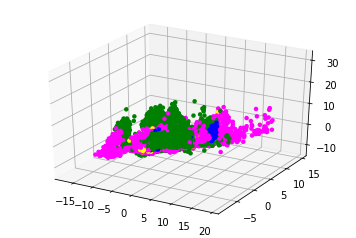

In [75]:
#fig = plt.scatter(component[:,0], component[:,1],component[:,2],c=colours_lab, edgecolor='', alpha=0.5)
#fig = plt.figure(fig)


b2 = colours_lab

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
line = ax.scatter(component[:,0], component[:,1] ,component[:,2] , c=b2, edgecolors='none', depthshade=0)
#cb = plt.colorbar(line)

def forceUpdate(event):
    global line
    line.changed()

fig.canvas.mpl_connect('draw_event', forceUpdate)

plt.show()

In [61]:
#ax = plt.axes(projection='3')

ax.scatter(component[:,0], component[:,1],component[:,2],
            c=cvec, edgecolor='', alpha=0.5)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  


In [5]:
svclassifier = SVC(kernel='poly')  
svclassifier.fit(np_non_var_1, np_class_ID_1)

NameError: name 'np_non_var_1' is not defined

In [2]:
y_pred = svclassifier.predict(np_non_var_2)  

NameError: name 'svclassifier' is not defined

In [92]:
print(confusion_matrix(np_class_ID_2,y_pred))  
print(classification_report(np_class_ID_2,y_pred))  

[[    0     2     0     0     0]
 [    0 42341   841  1869   110]
 [    0  2103    23     8    11]
 [    0   598     4  2755    85]
 [    0   186     2    16   188]]
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         2
          0       0.94      0.94      0.94     45161
          1       0.03      0.01      0.02      2145
          2       0.59      0.80      0.68      3442
          3       0.48      0.48      0.48       392

avg / total       0.87      0.89      0.88     51142



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(np_variables_1, np_class_ID_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
y_pred = svclassifier.predict(np_variables_2)

In [98]:
print(confusion_matrix(np_class_ID_2,y_pred))  
print(classification_report(np_class_ID_2,y_pred))

[[    0     1     0     1     0]
 [    0 44284     1   809    67]
 [    0  2098    15    32     0]
 [    0  1143     0  2287    12]
 [    0   348     0    12    32]]
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         2
          0       0.93      0.98      0.95     45161
          1       0.94      0.01      0.01      2145
          2       0.73      0.66      0.69      3442
          3       0.29      0.08      0.13       392

avg / total       0.91      0.91      0.89     51142



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
def reject_outliers(data, m = 6.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [115]:
DB1_c = DB1.drop(['class_beat'], axis=1)
DB2_c = DB2.drop(['class_beat'], axis=1)
#new_vari_1 = reject_outliers(DB1, m=20.)


In [118]:
DB1_out = reject_outliers(DB1_c, m=18)

In [39]:
transformer = FastICA(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(np_variables_1)
test_transformed = transformer.fit_transform(np_variables_2)

X_transformed.shape

(52487, 3)

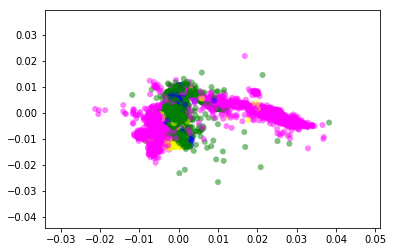

In [40]:
plt.scatter(test_transformed[:,0], test_transformed[:,1],c=colours_lab_2, edgecolor='', alpha=0.5)

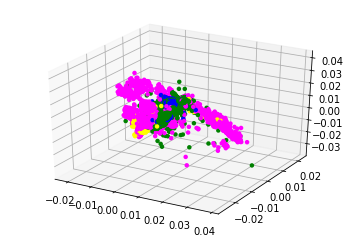

In [41]:
#fig = plt.scatter(component[:,0], component[:,1],component[:,2],c=colours_lab, edgecolor='', alpha=0.5)
#fig = plt.figure(fig)


b2 = colours_lab_2

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
line = ax.scatter(test_transformed[:,0], test_transformed[:,1] ,test_transformed[:,2] , c=b2, edgecolors='none', depthshade=0)
#cb = plt.colorbar(line)

def forceUpdate(event):
    global line
    line.changed()

fig.canvas.mpl_connect('draw_event', forceUpdate)

plt.show()

In [54]:
def compute_hos_descriptor(beat, n_intervals, lag):
    hos_b = np.zeros(( (n_intervals-1) * 2))
    for i in range(0, n_intervals-1):
        pose = (lag * (i+1))
        print(type(beat), (pose -(lag/2) ),(pose + (lag/2)) )
        interval = beat[int((pose -(lag/2) )):int((pose + (lag/2)))]
        
        # Skewness  
        hos_b[i] = scipy.stats.skew(interval, 0, True)

        if np.isnan(hos_b[i]):
            hos_b[i] = 0.0
            
        # Kurtosis
        hos_b[(n_intervals-1) +i] = scipy.stats.kurtosis(interval, 0, False, True)
        if np.isnan(hos_b[(n_intervals-1) +i]):
            hos_b[(n_intervals-1) +i] = 0.0
    return hos_b

In [59]:
n_intervals = 6
lag = int(round( (180 + 180)/ n_intervals))
beat =  np_amp_1[0,0:360]

In [19]:
#np_clinic_1_class = np.hstack((np_class_ID_1,np_variables_1, np_V1_1, dtw_clinic_1))
#np_clinic_2_class = np.hstack((np_class_ID_2,np_variables_2, np_V1_2, dtw_clinic_2))

np_clinic_1_class = np.hstack((np_variables_1, np_V1_1, dtw_clinic_1))
np_clinic_2_class = np.hstack((np_variables_2, np_V1_2, dtw_clinic_2))

np_clinic_1_class = np.hstack((np_class_ID_1,np_variables_1, np_V1_1, dtw_clinic_1, np_non_var_1,norm_var_1_MLII,norm_var_1_V1,norm_dtw_clinic_1))
np_clinic_2_class = np.hstack((np_class_ID_2,np_variables_2, np_V1_2, dtw_clinic_2, np_non_var_2,norm_var_2_MLII,norm_var_2_V2,norm_dtw_clinic_2))

np_clinic_1_class = np.hstack((np_class_ID_1, np_non_var_1))
np_clinic_2_class = np.hstack((np_class_ID_2, np_non_var_2))

In [46]:
feat_labels = ["R_duration", "R_height", "R_amp0", "R_amp1","R_amp2","R_amp3", "R_amp4", "R_amp5", "R_amp6", "R_amp7", "R_amp8", "R_amp9", "R_prominence","R_areas","Q_duration", "Q_height", "Q_amp0", "Q_amp1","Q_amp2","Q_amp3", "Q_amp4", "Q_amp5", "Q_amp6", "Q_amp7", "Q_amp8", "Q_amp9", "Q_prominence","Q_areas", "S_duration", "S_height", "S_amp0", "S_amp1","S_amp2","S_amp3", "S_amp4", "S_amp5", "S_amp6", "S_amp7", "S_amp8", "S_amp9", "S_prominence","S_areas", "P_duration", "P_height", "P_amp0", "P_amp1","P_amp2","P_amp3", "P_amp4", "P_amp5", "P_amp6", "P_amp7", "P_amp8", "P_amp9", "P_prominence","P_areas", "P_neg_duration", "P_neg_height", "P_neg_amp0", "P_neg_amp1","P_neg_amp2","P_neg_amp3", "P_neg_amp4", "P_neg_amp5", "P_neg_amp6", "P_neg_amp7", "P_neg_amp8", "P_neg_amp9", "P_neg_prominence","P_neg_areas", "T_duration", "T_height", "T_amp0", "T_amp1","T_amp2","T_amp3", "T_amp4", "T_amp5", "T_amp6", "T_amp7", "T_amp8", "T_amp9", "T_prominence","T_areas","T_neg_durations","T_neg_height", "T_neg_amp0", "T_neg_amp1", "T_neg_amp2", "T_neg_amp3", "T_neg_amp4", "T_neg_amp5", "T_neg_amp6", "T_neg_amp7", "T_neg_amp8", "T_neg_amp9","T_neg_prominence","T_neg_areas", "rr_int_pre", "rr_int_post", "rr_int_10", "rr_int_50", "rr_int_all", "QRS_int", "QRS_int_10", "QRS_int_50", "PQ_int", "PQ_int_10", "PQ_int_50", "PR_int", "PR_int_10", "PR_int_50", "ST_int", "ST_int_10", "ST_int_50", "RT_int", "RT_int_10", "RT_int_50", "PT_int", "PT_int_10", "PT_int_50", "RP","TR","neg_RQ", "neg_PR", "neg_ST", "neg_RT", "neg_PT", "P_neg_T", "neg_P_neg_T"]
feat_labels_V = ["R_duration_V", "R_height_V", "R_amp0_V", "R_amp1_V","R_amp2_V","R_amp3_V", "R_amp4_V", "R_amp5_V", "R_amp6_V", "R_amp7_V", "R_amp8_V", "R_amp9_V", "R_prominence_V","R_areas_V","Q_duration_V", "Q_height_V", "Q_amp0_V", "Q_amp1_V","Q_amp2_V","Q_amp3_V", "Q_amp4_V", "Q_amp5_V", "Q_amp6_V", "Q_amp7_V", "Q_amp8_V", "Q_amp9_V", "Q_prominence_V","Q_areas_V", "S_duration_V", "S_height_V", "S_amp0_V", "S_amp1_V","S_amp2_V","S_amp3_V", "S_amp4_V", "S_amp5_V", "S_amp6_V", "S_amp7_V", "S_amp8_V", "S_amp9_V", "S_prominence_V","S_areas_V", "P_duration_V", "P_height_V", "P_amp0_V", "P_amp1_V","P_amp2_V","P_amp3_V", "P_amp4_V", "P_amp5_V", "P_amp6_V", "P_amp7_V", "P_amp8_V", "P_amp9_V", "P_prominence_V","P_areas_V", "P_neg_duration_V", "P_neg_height_V", "P_neg_amp0_V", "P_neg_amp1_V","P_neg_amp2_V","P_neg_amp3_V", "P_neg_amp4_V", "P_neg_amp5_V", "P_neg_amp6_V", "P_neg_amp7_V", "P_neg_amp8_V", "P_neg_amp9_V", "P_neg_prominence_V","P_neg_areas_V", "T_duration_V", "T_height_V", "T_amp0_V", "T_amp1_V","T_amp2_V","T_amp3_V", "T_amp4_V", "T_amp5_V", "T_amp6_V", "T_amp7_V", "T_amp8_V", "T_amp9_V", "T_prominence_V","T_areas_V","T_neg_durations_V","T_neg_height_V", "T_neg_amp0_V", "T_neg_amp1_V", "T_neg_amp2_V", "T_neg_amp3_V", "T_neg_amp4_V", "T_neg_amp5_V", "T_neg_amp6_V", "T_neg_amp7_V", "T_neg_amp8_V", "T_neg_amp9_V","T_neg_prominence_V","T_neg_areas_V", "rr_int_pre_V", "rr_int_post_V", "rr_int_10_V", "rr_int_50_V", "rr_int_all_V", "QRS_int_V", "QRS_int_10_V", "QRS_int_50_V", "PQ_int_V", "PQ_int_10_V", "PQ_int_50_V", "PR_int_V", "PR_int_10_V", "PR_int_50_V", "ST_int_V", "ST_int_10_V", "ST_int_50_V", "RT_int_V", "RT_int_10_V", "RT_int_50_V", "PT_int_V", "PT_int_10_V", "PT_int_50_V", "RP_V","TR_V","neg_RQ_V", "neg_PR_V", "neg_ST_V", "neg_RT_V", "neg_PT_V", "P_neg_T_V", "neg_P_neg_T_V"]
feat_labels_dtw = ["dtw1","dtw2"]
norm_dtw = ["dtw1_v1","dtw2_v1"]
classID = ["classID"]
non_clinic = list(DB1_non_cli.iloc[:,0:140].columns.values)

feature_norm_mill = []
for i in range(len(feat_labels)):
    feature_norm_mill.append(str(feat_labels[i]+"_n_MLII"))

feature_norm_V1 = []
for i in range(len(feat_labels)):
    feature_norm_V1.append(str(feat_labels[i]+"_n_V1"))
    

c_ID = np.asarray(classID)
f_M = np.asarray(feat_labels)
f_V = np.asarray(feat_labels_V)
f_d = np.asarray(feat_labels_dtw)
non_cli = np.asarray(non_clinic)
norm_mlii = np.asarray(feature_norm_mill)
norm_v1 = np.asarray(feature_norm_V1)
norm_dtw = np.asarray(norm_dtw)


features_clinic = np.hstack((c_ID,non_cli))#f_M,f_V, f_d,non_cli,norm_mlii, norm_v1,norm_dtw))

row=[]
for i in range(0,len(np_clinic_1_class)):
    row.append(i)

In [47]:
df = pd.DataFrame(np_clinic_1_class,columns=features_clinic)

In [64]:
np_class_ID_1 = [int(i) for i in np_class_ID_1]


In [18]:
import pymrmr


In [50]:
#rank = mrmr(np_clinic_1_class,np_class_ID_1 )
#np_class_ID_1
rank=pymrmr.mRMR(df, 'MIQ', 50)

In [51]:
rank

['wave_MLII24',
 'wave_V141',
 'wave_MLII19',
 'hos_MLII0',
 'wave_MLII4',
 'wave_V125',
 'wave_MLII44',
 'wave_MLII12',
 'hbf_V19',
 'wave_MLII32',
 'hos_V12',
 'wave_MLII20',
 'hbf_MLII9',
 'wave_V129',
 'hos_V10',
 'wave_MLII35',
 'wave_MLII30',
 'wave_MLII11',
 'wave_V143',
 'wave_V131',
 'wave_MLII39',
 'wave_MLII9',
 'wave_MLII28',
 'hos_MLII7',
 'wave_V123',
 'hbf_MLII4',
 'wave_V142',
 'wave_MLII31',
 'wave_MLII13',
 'wave_V10',
 'wave_MLII42',
 'wave_MLII8',
 'wave_MLII23',
 'wave_MLII29',
 'wave_MLII10',
 'wave_V130',
 'wave_MLII34',
 'wave_V16',
 'wave_MLII0',
 'wave_MLII43',
 'wave_MLII2',
 'wave_MLII33',
 'wave_V121',
 'wave_MLII5',
 'hbf_V14',
 'wave_MLII36',
 'wave_V11',
 'wave_MLII41',
 'wave_V132',
 'wave_MLII27']

In [45]:
list(DB1_non_cli.iloc[:,0:140].columns.values)

['wave_MLII0',
 'wave_MLII1',
 'wave_MLII2',
 'wave_MLII3',
 'wave_MLII4',
 'wave_MLII5',
 'wave_MLII6',
 'wave_MLII7',
 'wave_MLII8',
 'wave_MLII9',
 'wave_MLII10',
 'wave_MLII11',
 'wave_MLII12',
 'wave_MLII13',
 'wave_MLII14',
 'wave_MLII15',
 'wave_MLII16',
 'wave_MLII17',
 'wave_MLII18',
 'wave_MLII19',
 'wave_MLII20',
 'wave_MLII21',
 'wave_MLII22',
 'wave_MLII23',
 'wave_MLII24',
 'wave_MLII25',
 'wave_MLII26',
 'wave_MLII27',
 'wave_MLII28',
 'wave_MLII29',
 'wave_MLII30',
 'wave_MLII31',
 'wave_MLII32',
 'wave_MLII33',
 'wave_MLII34',
 'wave_MLII35',
 'wave_MLII36',
 'wave_MLII37',
 'wave_MLII38',
 'wave_MLII39',
 'wave_MLII40',
 'wave_MLII41',
 'wave_MLII42',
 'wave_MLII43',
 'wave_MLII44',
 'wave_V10',
 'wave_V11',
 'wave_V12',
 'wave_V13',
 'wave_V14',
 'wave_V15',
 'wave_V16',
 'wave_V17',
 'wave_V18',
 'wave_V19',
 'wave_V110',
 'wave_V111',
 'wave_V112',
 'wave_V113',
 'wave_V114',
 'wave_V115',
 'wave_V116',
 'wave_V117',
 'wave_V118',
 'wave_V119',
 'wave_V120',
 'wave

In [91]:
rank_clinic

['dtw1',
 'P_neg_T',
 'R_amp0_V',
 'T_amp3',
 'T_neg_amp6',
 'neg_PT',
 'T_height',
 'T_neg_prominence',
 'neg_P_neg_T',
 'Q_amp3',
 'R_amp0',
 'S_amp0',
 'PT_int',
 'T_neg_amp7',
 'T_amp6',
 'dtw2',
 'T_amp9',
 'T_neg_amp2',
 'rr_int_post_V',
 'T_prominence',
 'T_neg_amp5',
 'T_amp7',
 'P_amp6',
 'T_neg_amp0',
 'Q_amp9_V',
 'T_amp2',
 'T_amp3_V',
 'T_neg_amp4',
 'T_amp5',
 'T_neg_amp8',
 'neg_PT_V',
 'R_amp5_V',
 'Q_amp0',
 'T_amp0',
 'T_neg_amp3',
 'T_amp4',
 'T_neg_height',
 'T_neg_amp9',
 'S_amp1',
 'T_amp8',
 'T_neg_amp1',
 'P_amp8',
 'T_amp1',
 'P_neg_T_V',
 'Q_amp9',
 'T_amp5_V',
 'rr_int_pre',
 'R_prominence_V',
 'S_amp9_V',
 'P_amp1']

In [90]:
df

,classID,R_duration,R_height,R_amp0,R_amp1,R_amp2,R_amp3,R_amp4,R_amp5,R_amp6,...,TR_V,neg_RQ_V,neg_PR_V,neg_ST_V,neg_RT_V,neg_PT_V,P_neg_T_V,neg_P_neg_T_V,dtw1,dtw2
0,0.0,0.028,1.049,0.219948,0.398143,0.611813,0.829272,1.006933,1.101911,1.089917,...,0.150,0.081,0.111,0.320,0.353,0.206,0.470,0.409,8.170442,8.398104
1,0.0,0.028,1.169,0.284922,0.484345,0.708654,0.928897,1.105888,1.199765,1.186056,...,0.486,0.136,0.169,0.509,0.561,0.600,0.756,0.675,7.540749,7.421939
2,0.0,0.028,1.206,0.470747,0.696073,0.918260,1.101844,1.209194,1.213387,1.111715,...,0.212,0.298,0.328,0.372,0.403,0.487,0.636,0.678,8.868044,8.824576
3,0.0,0.028,1.247,0.509657,0.736819,0.964207,1.155764,1.271569,1.281645,1.180520,...,0.530,0.130,0.172,0.314,0.350,0.644,0.537,0.464,6.733980,8.934560
4,0.0,0.027,1.129,0.370717,0.567181,0.776186,0.969592,1.110942,1.165644,1.116423,...,0.461,0.325,0.353,0.372,0.405,0.759,0.525,0.703,6.757782,8.441795
5,0.0,0.027,1.221,0.335252,0.554752,0.798806,1.030576,1.203196,1.273512,1.220665,...,0.150,0.091,0.119,0.325,0.353,0.216,0.514,0.419,6.842848,10.020539
6,0.0,0.028,1.333,0.355285,0.607895,0.897157,1.175458,1.382115,1.464535,1.402377,...,0.572,0.272,0.311,0.261,0.297,0.825,0.494,0.550,11.445924,8.665945
7,0.0,0.027,1.303,0.320267,0.561162,0.839869,1.106682,1.300740,1.372679,1.306824,...,0.433,0.214,0.242,0.339,0.367,0.619,0.623,0.553,8.617558,10.601417
8,0.0,0.027,1.274,0.368766,0.603380,0.858845,1.096003,1.267516,1.331548,1.270056,...,0.628,0.231,0.269,0.316,0.350,0.836,0.516,0.558,8.073906,10.907804
9,0.0,0.027,1.175,0.316869,0.515626,0.736391,0.951356,1.122416,1.210157,1.189961,...,0.622,0.158,0.197,0.414,0.450,0.763,0.672,0.591,7.032712,8.130331


In [25]:
X_train = np_non_var_1
X_test = np_non_var_2
y_train = np_class_ID_1
y_test = np_class_ID_2

In [24]:
pca = PCA(n_components=50)
pca.fit(X_train)

component = pca.transform(X_train)


pca.fit(X_test)
component_2 = pca.transform(X_test)


In [27]:
X_train = np_non_var_1
X_test = np_non_var_2
y_train = np_class_ID_1
y_test = np_class_ID_2

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
clf = LinearDiscriminantAnalysis()

In [29]:
clf.fit(X_train, y_train)  

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [30]:
y_pred = clf.predict(X_test)  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[41960  1344  1434   423]
 [ 2030    69    43     3]
 [ 1263   171  1872   136]
 [  182    70    11   129]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     45161
           1       0.04      0.03      0.04      2145
           2       0.56      0.54      0.55      3442
           3       0.19      0.33      0.24       392

   micro avg       0.86      0.86      0.86     51140
   macro avg       0.43      0.46      0.44     51140
weighted avg       0.86      0.86      0.86     51140



In [31]:
metric.get_class_metrics(y_pred,y_test)

[[0.9235171123583141, 0.9291202586302341],
 [0.04171704957678356, 0.032167832167832165],
 [0.5571428571428572, 0.5438698431144683],
 [0.18668596237337193, 0.32908163265306123]]

In [ ]:
#for clinical important
[[0.9370271570385271, 0.9489161001749297],
 [0.46153846153846156, 0.06713286713286713],
 [0.5932714034647251, 0.6865194654270773],
 [0.2871287128712871, 0.8137755102040817]]

In [ ]:
#for non clinical linear
[[0.9200612622577694, 0.9577511569717234],
 [0.028368794326241134, 0.0018648018648018648],
 [0.589792663476874, 0.5371876815804765],
 [0.2403282532239156, 0.5229591836734694]]

[[0.9322647362978284, 0.958171873962047],
 [0.6666666666666666, 0.0037296037296037296],
 [0.5886479591836735, 0.8044741429401511],
 [0.25, 0.00510204081632653]]

In [ ]:
##all the relavant features
['dtw1',
 'P_neg_T',
 'R_amp0_V',
 'T_amp3',
 'T_neg_amp6',
 'neg_PT',
 'T_height',
 'T_neg_prominence',
 'neg_P_neg_T',
 'Q_amp3',
 'R_amp0',
 'S_amp0',
 'PT_int',
 'T_neg_amp7',
 'T_amp6',
 'dtw2',
 'T_amp9',
 'T_neg_amp2',
 'rr_int_post_V',
 'T_prominence',
 'T_neg_amp5',
 'T_amp7',
 'P_amp6',
 'T_neg_amp0',
 'Q_amp9_V',
 'T_amp2',
 'T_amp3_V',
 'T_neg_amp4',
 'T_amp5',
 'T_neg_amp8',
 'neg_PT_V',
 'R_amp5_V',
 'Q_amp0',
 'T_amp0',
 'T_neg_amp3',
 'T_amp4',
 'T_neg_height',
 'T_neg_amp9',
 'S_amp1',
 'T_amp8',
 'T_neg_amp1',
 'P_amp8',
 'T_amp1',
 'P_neg_T_V',
 'Q_amp9',
 'T_amp5_V',
 'rr_int_pre',
 'R_prominence_V',
 'S_amp9_V',
 'P_amp1']

In [18]:
from kmeans_smote import KMeansSMOTE

In [19]:
[print('Class {} has {} instances'.format(label, count))
for label, count in zip(*np.unique(np_class_ID_1, return_counts=True))]

Class 0 has 47054 instances
Class 1 has 1009 instances
Class 2 has 3990 instances
Class 3 has 433 instances


[None, None, None, None]

In [20]:
kmeans_smote = KMeansSMOTE(sampling_strategy='auto',
    kmeans_args={
    'n_clusters': 4
    },
    smote_args={
        'k_neighbors': 10})

In [21]:

X_resampled, y_resampled = kmeans_smote.fit_sample(np_clinic_1, np_class_ID_1)

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chont\Anaconda3\lib\site-packages\kmeans_smote.py:322: UserWarning: No minority clusters found for class 1. Performing regular SMOTE. Try changing the number of clusters.
  warnings.warn('No minority clusters found for class {}. Performing regular SMOTE. Try changing the number of clusters.'.format(minority_class_label))
C:\Users\chont\Anaconda3\lib\site-packages\kmeans_smote.py:213: RuntimeWarning: overflow encountered in double_scalars
  density_factor = minority_count / (average_minority_distance ** self.density_power)
C:\Users\chont\Anaconda3\lib\site-packages\kmeans_smote.py:214: RuntimeWarning: divide by zero encountered in double_scalars
  sparsity_factors[i] = 1 / density_factor
C:\Users\chont\Anaconda3\lib\s

In [24]:
[print('Class {} has {} instances after oversampling'.format(label, count))
for label, count in zip(*np.unique(y_resampled, return_counts=True))]


Class 0 has 47054 instances after oversampling
Class 1 has 93099 instances after oversampling
Class 2 has 90118 instances after oversampling
Class 3 has 93675 instances after oversampling


[None, None, None, None]

In [50]:
pca = PCA(n_components=3)
pca.fit(X_resampled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
y_resampled = [int(i) for i in y_resampled]

label_color_dict = {0:'green',1:'blue',2:'magenta', 3:'yellow'}
bi_colour = {1:'green',3:'blue'}
bi_colour_2 = {2:'green',3:'blue'}
bi_colour_3 = {0:'green',1:'blue'}
bi_colour_4 = {0:'green',2:'blue'}

colours_lab_d = [label_color_dict[id] for id in y_resampled]

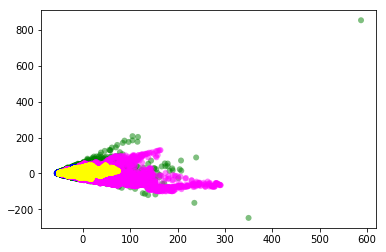

In [52]:
component = pca.transform(X_resampled)
#component2 = pca.transform(np_non_var_2)

#component2 = pca.transform(ampt_time_1)
plt.scatter(component[:,0], component[:,1],c=colours_lab_d, edgecolor='', alpha=0.5)